<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/la-conga-machinelearning/la-conga-machinelearning-student/-/raw/main/imgs/banner_DA.png"  width="1000px" height="250px">




# <center> **02. classification metrics!** </center>


## **Outline**

1. [**Naive Bayes example**](#eje1)
2. [**Metrics and Evaluation on classification**](#eje2)
    

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [ ]:
#@title 2. **LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

(1372, 5)
(1372, 4) (1372,)


varwt   skewt   curwt   entrwt  class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

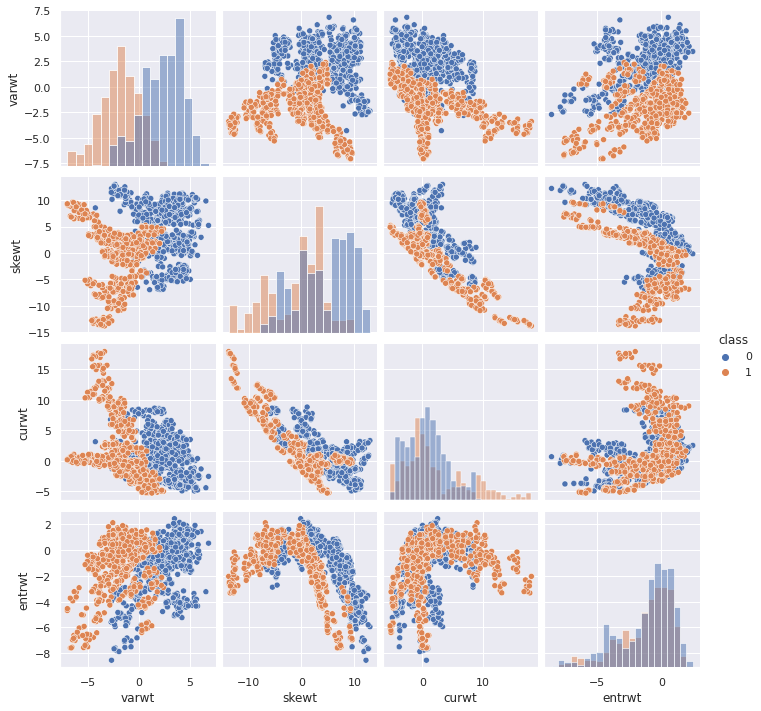

In [ ]:
#@title **code** To read the dataset
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d.shape)
X = d.values[:,:-1]
y = d.values[:,-1]
sns.pairplot(d, hue="class", diag_kind="hist");# kind="kde"
print(X.shape, y.shape)
d.head()

# **1. Naive Bayes example**
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Why this classifier is **Naive**?
- Why this classifier is **Naive Gaussian Bayes** ?
- How it works with different features?


In [ ]:
#@title  **code** Typical split. Is it sufficient?
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
est = GaussianNB()

est.fit(X_train,y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

0.835


# **2. Metrics and Evaluation on classification** <a name="eje2"></a> 

Let's use cross validation and build more confidence in our results

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/kfold.jpg" style="width:400px;">

In [ ]:
#@title **code:** cross-validation 
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.92753623 0.86956522 0.8540146  0.8540146  0.86861314 0.81751825
 0.83211679 0.84671533 0.7810219  0.75182482]
accuracy 0.840 (+/- 0.04649)


let's understand better how this estimator is performing.

- TPR: true positive rate (sensitivity), e.g.,  the percentage of sick people who are correctly identified as having the condition
- TNR: true negative rate (specificity), e.g., the percentage of healthy people who are correctly identified as not having the condition

From Wiki: 

- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

In general

- True positive = correctly identified
- False positive = incorrectly identified
- True negative = correctly rejected
- False negative = incorrectly rejected

In [ ]:
#@title **code** other metrics
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
#@title **code** we can obtain performance with different metrics
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

tpr 0.792 (+/- 0.04443)
tnr 0.878 (+/- 0.03933)


## **A classification report**

We can summarize performance by computing some different metrics with sklearn

In [ ]:
#@title **code** classification report
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
est = GaussianNB()

est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       235
         1.0       0.81      0.80      0.81       177

    accuracy                           0.83       412
   macro avg       0.83      0.83      0.83       412
weighted avg       0.83      0.83      0.83       412



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What is precision, recall, and f-1 score?
- How interpret these metrics?

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, we will work with the **Dataset de cancer de mama**
- use the  sklearn: `from sklearn.datasets import load_breast_cancer`
- To get a classifier using a particular partition (train=80, test=20)
- To do a classifier using a K-fold of 10
- We can explore for small datasets the leave-one patient out. To do a evalaution using this thecnique. 


mean radius  mean texture  ...  worst fractal dimension  diagnosis
0        17.99         10.38  ...                  0.11890        0.0
1        20.57         17.77  ...                  0.08902        0.0

[2 rows x 31 columns]

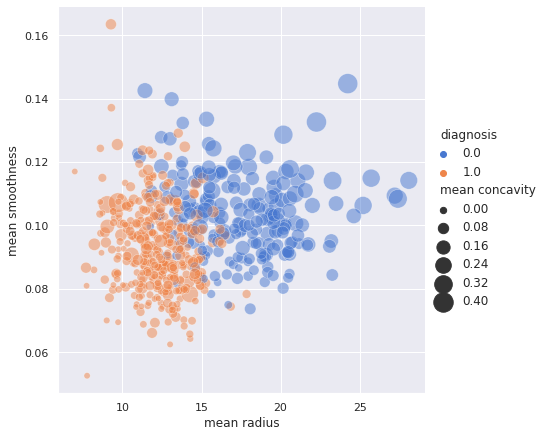

In [ ]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **code student**

# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
